In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df = pd.read_csv(r"../Datasets/USA_Housing.csv")

In [68]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [77]:
df.describe()

## we can see the distribution of each dataser from here as well.

# Left/Negatively-Skewed : mean < median
# most of the distributions look negatively sloped.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


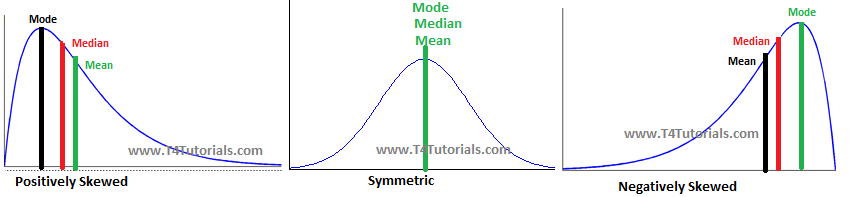

In [76]:
from IPython import display
display.Image("Skewness.png")

In [71]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [72]:
# simple plots to chcek the data

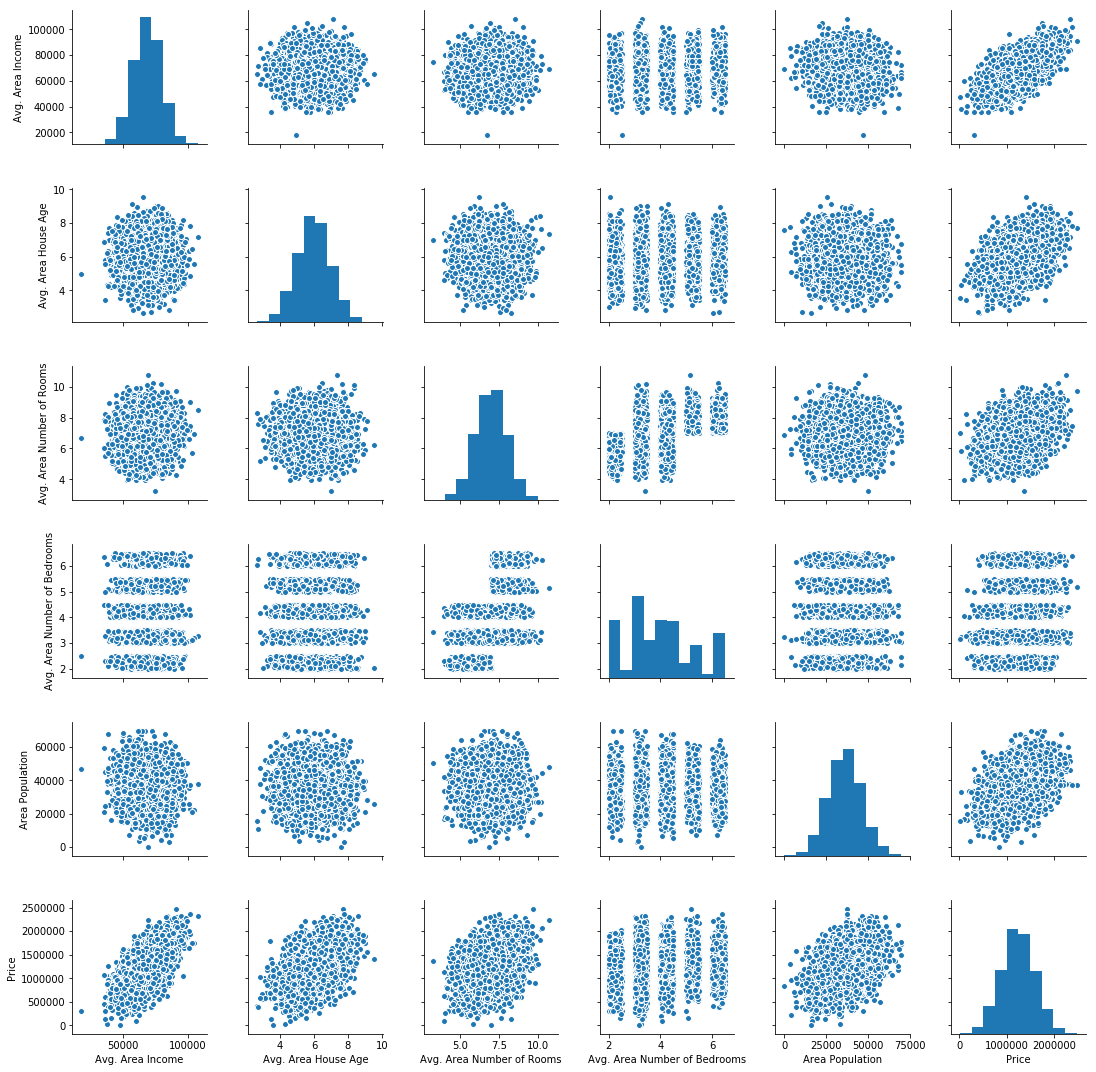

In [73]:
sns.pairplot(df)

In [23]:
# in above, we can see from the histograms that all the variables except "Avg No. of Bedrooms" are normally distributed. 

# see te histogram of this
# moreover, the scatterplot of avg. no. of bedrooms is segmented.

# where scatter plots are upwards, there is strong correltaion
# wherever scatterplots are in circular form etc. there is low correlation
# we can use df.corr() to check correlation b/w diffrnt variables

In [11]:
#check the distibution of taget variable i.e. the one we are tryng to predict. Here, that's price

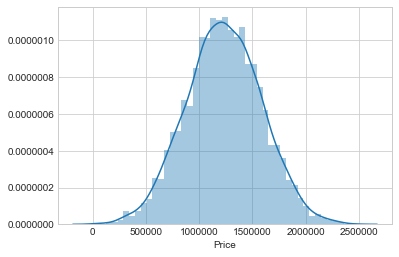

In [15]:
sns.set_style("whitegrid")
sns.distplot(df["Price"])

# so price here is normally distributed and price is falling after 10 lakhs. Usually, the target varibale may/may not be normally
# distributed

In [16]:
# after this, use heatmap to check correlation b/w various variables

In [21]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


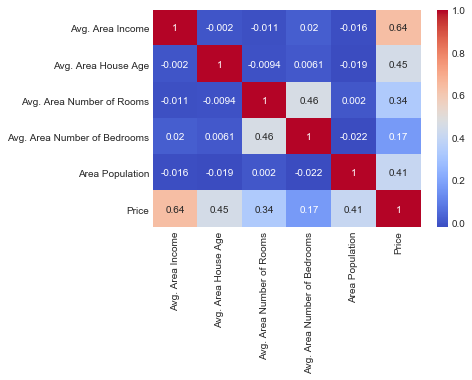

In [22]:
sns.heatmap(df.corr(), cmap = "coolwarm", annot= True)

## Splitting the data into test n training data

In [25]:
# x variable will have independent variables while y will have target/dependent variable, value of which we're trying to predict

In [27]:
# we won't use "Address" column since that has text data which isn't useful till we learn NLP.

In [78]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [80]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = df["Price"]

In [82]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101 )
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3000, 5) (3000,)
(2000, 5) (2000,)


In [38]:


# here, random_state provides a level/extent of random split on the data.
# if 2 people are using different random_state values they'll get different results as train and test dataset

In [83]:
# train the model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [42]:
# printing the intercepts and coffecients and interpreting them.

In [43]:
lm.coef_

array([  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
         2.23380186e+03,   1.51504200e+01])

In [44]:
lm.intercept_

-2640159.7968526692

In [45]:
# create a dataframe of above intercepts and coffecients to have a better view

In [50]:
cdf = pd.DataFrame(data = lm.coef_, index = X_train.columns, columns= ["Coeff"])
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [51]:
# in predict method, we pass the features that the model hasn't seen before. i.e. we will pass X_test dataset

predictions = lm.predict(X_test)

In [53]:
# these are predicted values of "y" i.e. Prices

predictions

array([ 1260960.70567627,   827588.7556033 ,  1742421.24254342, ...,
         372191.40626916,  1365217.15140897,  1914519.5417888 ])

Text(0,0.5,'Predicted Y')

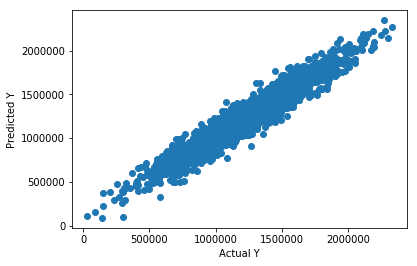

In [84]:
# to check how much actual y values correspond to predicted y values. we use, scatterplot

plt.scatter(x = y_test, y = predictions)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")

# following shows that the values are accurately fitting to a straight line.

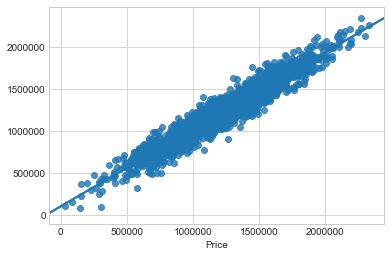

In [58]:
sns.regplot(y_test, predictions)

In [60]:
# distribution of residuals

residual = y_test - predictions

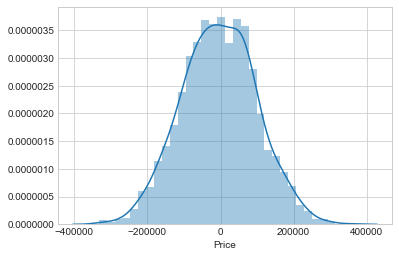

In [63]:
sns.distplot(residual)

# residuals being normally distributed is a good sign & it shows that the model(here, linear regression) was indeed 
#a good fit for the chosen dataset.

# if not normally distributed, need to chck the dataset again & see why linear regression isn't a good choice

In [65]:
# Regression Evaluation Metrics

In [66]:
from sklearn import metrics

In [67]:
metrics.mean_absolute_error(y_true = y_test, y_pred= predictions)

82288.222519149436

In [68]:
metrics.mean_squared_error(y_true = y_test, y_pred= predictions)

10460958907.208952

In [69]:
# for root mean sq. error, we take sq.root of above one

np.sqrt(metrics.mean_squared_error(y_true = y_test, y_pred= predictions))

102278.82922290884

### Using OLS directly on USA Housing Dataset

In [87]:
boston = pd.read_csv(r"../Datasets/USA_Housing.csv")

In [88]:
boston.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [89]:
boston.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [108]:
X = boston[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = boston["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

model = sm.OLS(endog=y_train,exog=X_train).fit()
y_predict = model.predict(X_test)

print(model.summary())
print()

#Checking MSE
MSE = sklearn.metrics.mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
print("RMSE : {}".format(RMSE))

(3000, 5) (3000,)
(2000, 5) (2000,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.633e+04
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        20:45:30   Log-Likelihood:                -41426.
No. Observations:                3000   AIC:                         8.286e+04
Df Residuals:                    2995   BIC:                         8.289e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**Results Interpretation**

1.  from above OLS results, we can see that t-statistics of "Area No. of Rooms" and "Area No. of Bedrooms" are Quite lower, meaning that these 2 variables aren't explaining much of variation in "Price". So we can check by dropping the result to see if result improves

2. R-square right now is 0.965
3. MSE is 244627.511

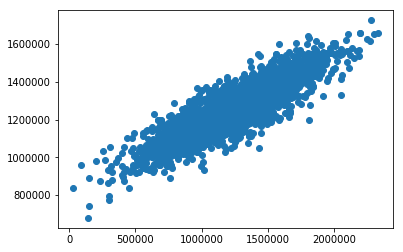

In [97]:
plt.scatter(y_test,y_predict)

### Improving Feature Selection - By Dropping Irrelevant Variables.

In [109]:
X = boston[["Avg. Area Income","Avg. Area House Age","Area Population"]]
y = boston["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

model = sm.OLS(endog=y_train,exog=X_train).fit()
y_predict = model.predict(X_test)

print(model.summary())
print()

#Checking MSE
MSE = sklearn.metrics.mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
print("RMSE : {}".format(RMSE))

(3000, 3) (3000,)
(2000, 3) (2000,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.719e+04
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        20:51:31   Log-Likelihood:                -41428.
No. Observations:                3000   AIC:                         8.286e+04
Df Residuals:                    2997   BIC:                         8.288e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

**Results Improvement**

1. R-squared is same
2. Features included in Model are Relevant (All are statistaically Significant)
3. Values of Slope coeffiencents has increased

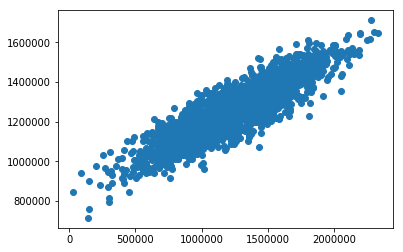

In [110]:
plt.scatter(y_test,y_predict)

## Further Improvement in Results : Parameter Tuning Using K-Fold Cross-Validation

In [124]:
X = boston[["Avg. Area Income","Avg. Area House Age","Area Population"]]
y = boston["Price"]

lin_reg = LinearRegression()
score = sklearn.cross_validation.cross_val_score(lin_reg,X,y,scoring="mean_squared_error",cv=10)
print("Scores of 10 times cross-validation : {}".format(score))
print()
print("Mean of the Scores : {}".format(score.mean()))
print()
print("RMSE : {}".format(np.sqrt(-(score.mean()))))


Scores of 10 times cross-validation : [ -2.71192489e+10  -2.19538312e+10  -2.53972824e+10  -2.44047246e+10
  -2.31189809e+10  -2.61160475e+10  -2.71251708e+10  -2.61307819e+10
  -2.60525031e+10  -2.47521155e+10]

Mean of the Scores : -25217068687.00488

RMSE : 158798.83087417512


In [ ]:
## If you want to use USA Housing Boston dataset directly from sklearn, then it can be done as follows:

In [2]:
import statsmodels.api as sm
import sklearn.datasets

In [3]:
boston = sklearn.datasets.load_boston()

In [17]:
boston.DESCR.split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [11]:
boston.feature_names  # this is independent variables i.e. exogeneous 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [10]:
boston.target.shape # this is dependent/endogeneous variable

(506,)

In [12]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [13]:
df = pd.DataFrame(data = boston.data,columns=boston.feature_names)

In [14]:
target = pd.DataFrame(boston.target,columns=["MEDV"])  #there isn't anything like target.names, so we put the target name

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [18]:
target["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

What we’ve done here is the take the dataset and load it as a pandas data frame; after that, we’re setting the predictors (as df) — the independent variables that are pre-set in the dataset. We’re also setting the target — the dependent variable, or the variable we’re trying to predict/estimate.

Next we’ll want to fit a linear regression model. We need to choose variables that we think we’ll be good predictors for the dependent variable — that can be done by checking the correlation(s) between variables, by plotting the data and searching visually for relationship, by conducting preliminary research on what variables are good predictors of y etc. For this first example, let’s take RM — the average number of rooms and LSTAT — percentage of lower status of the population. It’s important to note that Statsmodels does not add a constant by default. Let’s see it first without a constant in our regression model:

In [21]:
# Without a constant : Bivariate Regression (One Independent Variable.)

from sklearn.cross_validation import train_test_split

X = df["RM"]  # we are taking average number of rooms per dwelling as the only relevant feature
y = target["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101 )

model = sm.OLS(endog=y_train,exog=X_train).fit()
y_predict = model.predict(X_test)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     2801.
Date:                Wed, 30 May 2018   Prob (F-statistic):          7.90e-155
Time:                        12:43:23   Log-Likelihood:                -1028.8
No. Observations:                 303   AIC:                             2060.
Df Residuals:                     302   BIC:                             2063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.5131      0.066     52.928      0.000       3.382       3.644
==============================================================================
Omnibus:                       66.598   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.336
Skew:                           1.055   Prob(JB):                     4.15e-35
Kurtosis:                       5.844   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(X_train.shape)
print(X_test.shape)

(303,)
(203,)


In [30]:
X_test.head()

195    7.875
4      7.147
434    6.208
458    6.301
39     6.595
Name: RM, dtype: float64

In [28]:
y_predict

195    27.665398
4      25.107885
434    21.809116
458    22.135831
39     23.168673
304    25.420548
225    30.651504
32     20.902745
157    24.391220
404    19.430770
65     22.097188
138    20.576030
18     19.167290
352    20.670883
114    21.970717
407    19.701276
417    18.633304
290    24.103148
95     23.274065
321    22.399311
439    19.768025
12     20.688448
505    21.183790
252    24.440403
291    25.111399
361    21.960178
234    23.628885
128    22.592530
372    20.639265
198    25.554045
         ...    
16     20.850049
412    16.258471
430    22.300945
41     23.783459
431    24.004783
295    23.460257
325    22.592530
216    20.684935
335    21.208382
502    21.499966
267    29.147912
169    22.490651
268    26.242606
218    20.906258
454    23.635911
45     19.961243
153    20.056096
70     22.543347
277    23.980191
148    18.218762
112    20.772762
409    24.071531
90     22.543347
375    25.691054
469    20.070148
78     21.893430
160    21.956665
124    20.6533

In [63]:
# model with a constant term. By default, there isn't any constant term in the OLS. We have to add it manually.

boston = sklearn.datasets.load_boston()
df = pd.DataFrame(data = boston.data,columns=boston.feature_names)
target = pd.DataFrame(data=boston.target,columns=["MEDV"])

X = df["RM"]
y= target["MEDV"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(endog=y,exog=X).fit()    ## sm.OLS(output, input)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 30 May 2018   Prob (F-statistic):           2.49e-74
Time:                        18:35:46   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpreting the Table** — With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -34.67. We also changed the slope of the RM predictor from 3.634 to 9.1021.